<a href="https://colab.research.google.com/github/sebdisiena/Simple-Keras-Model/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# train signle layer neural network to classify dataset into 2 discrete classes
# using keras
import numpy as np
import tensorflow as tf
# sequential is a linear stack of layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

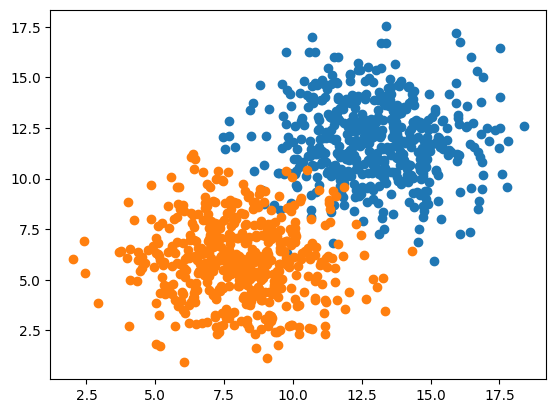

In [4]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [8]:
model = Sequential()
# 1 layer perceptron with 2 input nodes and one output node and implements the
# sigmoid activation function
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
# adaptive method learning algorithms - Stochastic optimization
adam = Adam(learning_rate = 0.1)
# binary as outputs are either 0 or 1 as 2 classes, metric to detmerine the accuracy
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
# epoch is times it iterates over entire data set, shuffle to avoid local minimums
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5012 - loss: 6.5688    
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5250 - loss: 1.3903  
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6442 - loss: 0.7007 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6886 - loss: 0.5984 
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7788 - loss: 0.4960 
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8287 - loss: 0.4305 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8820 - loss: 0.3881 
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9162 - loss: 0.3417 
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9293 - loss: 0.3079 
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9547 - loss: 0.2806 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.2624 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

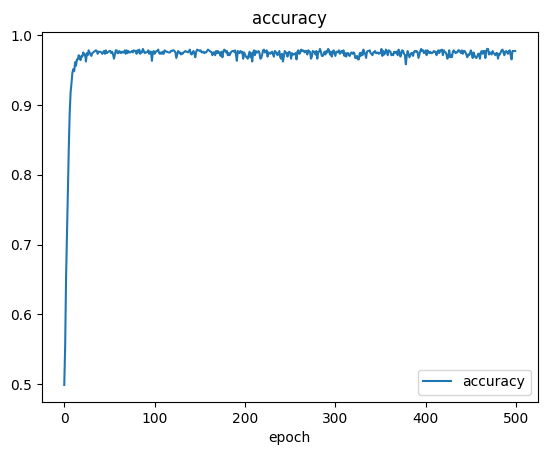

In [9]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

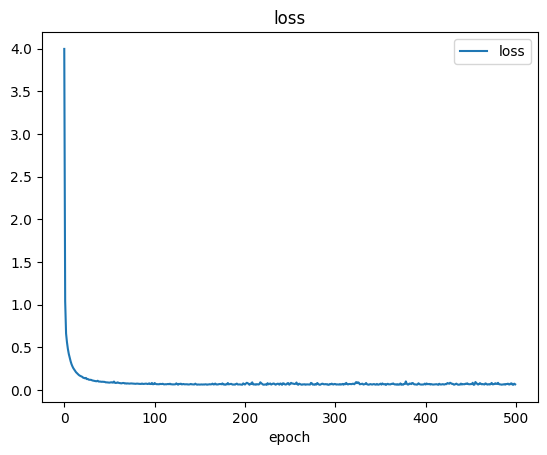

In [10]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])